<img scr ="https://www.google.co.in/imgres?imgurl=http%3A%2F%2F3.bp.blogspot.com%2F-itB7-AuweWg%2FUPKRV-7BZsI%2FAAAAAAAAADk%2FnwUBL3dan9Q%2Fs1600%2Fbig_mart_20110325093847.jpg&imgrefurl=http%3A%2F%2Fseeksaurav.blogspot.com%2F2013%2F01%2Fweek-8.html&docid=1OEkKNkScqBaeM&tbnid=_RSunStIEq5rbM%3A&vet=10ahUKEwi6l5rw0L7cAhXSXn0KHUunBGEQMwhuKCQwJA..i&w=600&h=450&safe=active&bih=859&biw=1774&q=bigmart%20sale%20price%20problem&ved=0ahUKEwi6l5rw0L7cAhXSXn0KHUunBGEQMwhuKCQwJA&iact=mrc&uact=8", height=250, width=250 >

# LifeCycle fo Data Scient Project 
-------------------------------------------------
### 1. Defining the problem statement  
### 2. Collecting the data
### 3. Exploratory data analysis
### 4. Feature engineering
### 5. Modelling
### 6. Testing

## 1.Defining the problem statement

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.Also, certain attributes of each product and store have been defined. 
The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

![title](http://3.bp.blogspot.com/-itB7-AuweWg/UPKRV-7BZsI/AAAAAAAAADk/nwUBL3dan9Q/s1600/big_mart_20110325093847.jpg)

## 2. Collecting the data

Training data set and testing data set are given by Kaggle you can download from
my github https://github.com/vishalbule/Practical-Data-Science

#### Load train, test dataset using Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plot
import seaborn as sns
%matplotlib inline

train=pd.read_csv("/Users/vishal.bule/Desktop/ML/Train_BigMart.csv")
test=pd.read_csv("/Users/vishal.bule/Desktop/ML/Test_BigMart.csv")


In [32]:
print train.shape
print "--------------"
print train.count()
print "--------------"
print train.isnull().sum()

(8523, 13)
--------------
Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
Count_Item_Outlet_Sales      8523
dtype: int64
--------------
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Count_Item_Outlet_Sales         0
dtype: int64


## 3. Exploratory data analysis

Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

#### 1.Variable Identification
#### 2.Univariate Analysis
#### 3.Bi-variate Analysis
#### 4.Missing values treatment
#### 5.Outlier treatment
#### 6.Variable transformation
#### 7.Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.



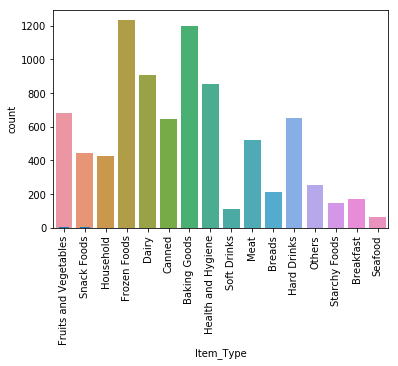

In [33]:
#train['Item_Type'].value_counts().sort_index().plot.bar()

sns.countplot(train['Item_Type'])

(train['Item_Type'].value_counts()/len(train)).plot.bar()

#### Lets visualization number item sold in perticulter outlet 

(8523, 13)


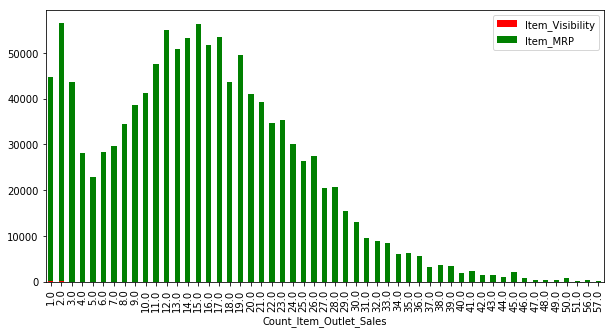

In [43]:
train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].apply(lambda x: round(x,0))
train['Item_MRP'] = train['Item_MRP'].apply(lambda x: round(x,0))
train['Count_Item_Outlet_Sales']=train['Item_Outlet_Sales']/train['Item_MRP']
train['Count_Item_Outlet_Sales'] = train['Count_Item_Outlet_Sales'].apply(lambda x: round(x,0))

print train.shape
train.head(50)

train.groupby('Count_Item_Outlet_Sales').agg('sum')[['Item_Visibility','Item_MRP']].plot(kind='bar',colors=['r','g'],figsize=(10, 5),stacked=True)